# Universidad El Bosque 
## Semillero de Hacking Etíco    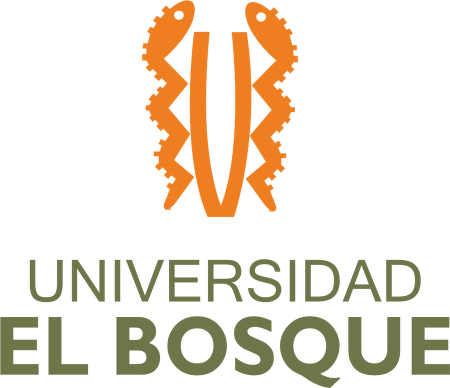
## Ingeniería de Sistemas

<h1 style="font-size: 40px;">S-DES Desencriptación</h1>

El algoritmo S-DES es un simplificación del des convencional, esta diseñado para entender el funcionamiento y estructuración del des comercial.

Primero se deben declarar el mensaje Encriptado de 8 bits y la clave de 10 bits

In [2]:
message = "00100110"
key = "0010010111"

Antes de empezar vamos a declarar algunos métodos que nos serán de utilidad mas adelante

1. Método para realizar la permutación.


In [3]:
def permutation(perm, key):
    permutated_key = ""
    for i in perm:
        permutated_key += key[i-1]
    return permutated_key

2. Método para buscar en las matrices de las sbox

In [4]:
def Sbox(input, sbox):
    row = int(input[0] + input[3], 2)
    column = int(input[1] + input[2], 2)
    return bin(sbox[row][column])[2:].zfill(4)

Luego de definir las dos variables se debe seguir el flujo de encripcción que es el siguiente: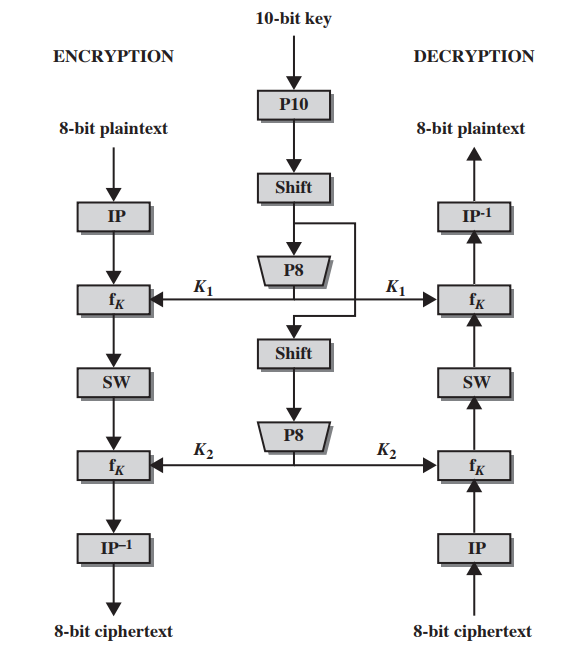

## Hallar las claves

Lo primero que se debe realizar es sacar las dos claves que vamops a utiliza durante el proceso (K1, K2), estas se sacan de la siguiente manera: 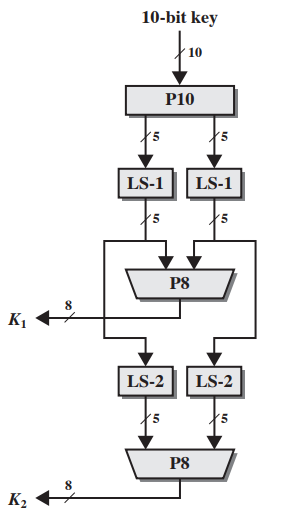

Vamos a realizarlo paso por paso:

1. a la clave de 10 bits vamos a aplicarle la permutación P10 que esta definida de la siguiente manera: 

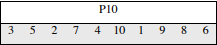

definamos P10 en un arreglo

In [5]:
P10 = (3, 5, 2, 7, 4, 10, 1, 9, 8, 6)

recordemos nuestra clave:

In [6]:
key

'0010010111'

Apliquemos P10

In [7]:
p10key = permutation(P10, key)
print(p10key)

1000010111


2. El siguiente paso es dividir el resultado en dos partes cada una de 5 bits y aplicar una rotación de una posición hacia la izquierda en cada una de las partes.

In [8]:
left = p10key[:int(len(p10key)/2)]
right = p10key[int(len(p10key)/2):]
print(p10key)
print(left+" | "+right)

1000010111
10000 | 10111


aplicamos la rotación

In [9]:
left_key_rot = left[1:] + left[:1]
right_key_rot = right[1:] + right[:1]
print("antes:    "+left+" | "+right)
print("          ▽▽▽▽▽▽▽▽▽")
print("despues:  "+left_key_rot+" | "+right_key_rot)

antes:    10000 | 10111
          ▽▽▽▽▽▽▽▽▽
despues:  00001 | 01111


3. juntamos ambos arreglos de 5 bits y aplicamos P8 que esta definida de la siguiente manera: 

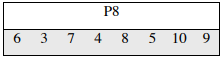

definamos P8 en un arreglo

In [10]:
P8 = (6, 3, 7, 4, 8, 5, 10, 9)

aplicamos P8 a la suma de las dos anteriores rotaciones y obtendriamos la primera clave

In [11]:
K1 = permutation(P8, left_key_rot+right_key_rot)
print (K1)

00101111


4. ya obtenida la primera clave procederemos a sacar la segunda, para esto es necesario realizar una rotación de dos posiciones a la izquierdas de las anteriores rotaciones que habiamos realizado

In [12]:
print("antes:    "+left_key_rot+" | "+right_key_rot)
left_key_rot_2 = left_key_rot[2:] + left_key_rot[:2]
right_key_rot_2 = right_key_rot[2:] + right_key_rot[:2]
print("          ▽▽▽▽▽▽▽▽▽")
print("despues:  "+left_key_rot_2+" | "+right_key_rot_2)

antes:    00001 | 01111
          ▽▽▽▽▽▽▽▽▽
despues:  00100 | 11101


aplicamos P8 a la suma de estas dos anteriores rotaciones y obtendriamos la segunda clave

In [13]:
K2 = permutation(P8, left_key_rot_2+right_key_rot_2)
print (K2)

11101010


## Iniciamos la desencriptación

Recordemos nuestro mensaje encriptado

In [14]:
message

'00100110'

para esto vamos la secuencia del siguiente grafico la realizaremos paso a paso:

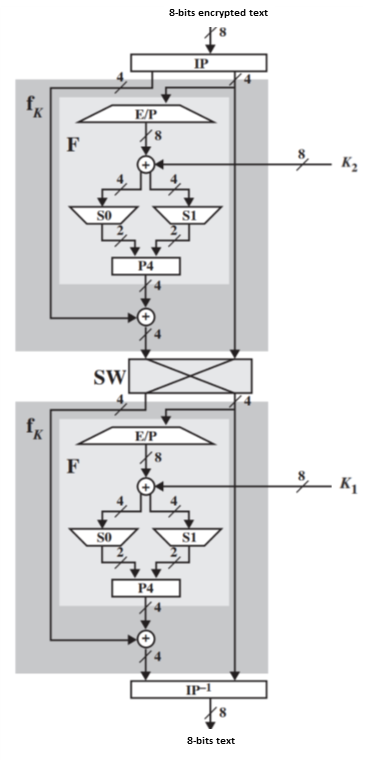

1. Al mensaje le vamos a aplicar la permutación IP que define de la siguiente manera: 

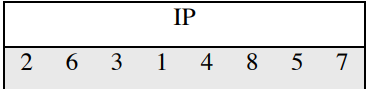

definamos IP en un arreglo


In [15]:
IP = (2, 6, 3, 1, 4, 8, 5, 7)

aplicamos IP al mensaje

In [16]:
mIp = permutation(IP, message)
print(mIp)

01100001


2. La salida de la inversa de IP la divimos en dos partes cada una de 4 bits.

In [17]:
mleft = mIp[:int(len(mIp)/2)]
mright = mIp[int(len(mIp)/2):]
print(mIp)
print(mleft+" | "+mright)

01100001
0110 | 0001


3. con los 4 bits de la derecha vamos a realizar F (ver grafico fk), para lo que aplicaremos E/P que se define de la siguiente forma:

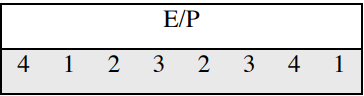

definimos E/P en un arreglo

In [18]:
EP = (4, 1, 2, 3, 2, 3, 4, 1)

aplicamos E/P con los 4 bits derechos del punto anterior.

In [19]:
mEp = permutation(EP, mright)
print(mEp)

10000010


4. con el resultado aplicamos un XOR con la segunda clave que sacamos anterior mente. 

    recuerda que el XOR en un or exclusivo. 

    recordemos nuestra primera clave:

In [20]:
K2

'11101010'

Aplicamos el XOR

In [21]:
rXor = bin( int(mEp, 2) ^ int(K2, 2) )[2:].zfill(8)
print(rXor)

01101000


5. Este resultado lo vamos a dividir en dos partes cada una de 4 bits y vamos a aplicar el sBox de des que se basa en las siguientes dos matrices:

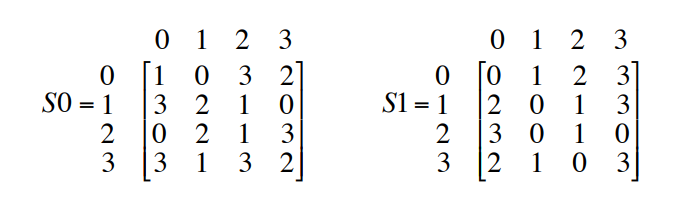

En estas sBox se basa el sentido de S-DES. Lo que debemos tomar son los 4 bits y partirlos en dos partes extremos y medios con estos podemos formar numeros entre 0 y 3 los que nos indicaran una cordenada para realizar el cambio por el numero en decimal en la matriz para posteriormente pasarlo a binario.

Ejemplo: 

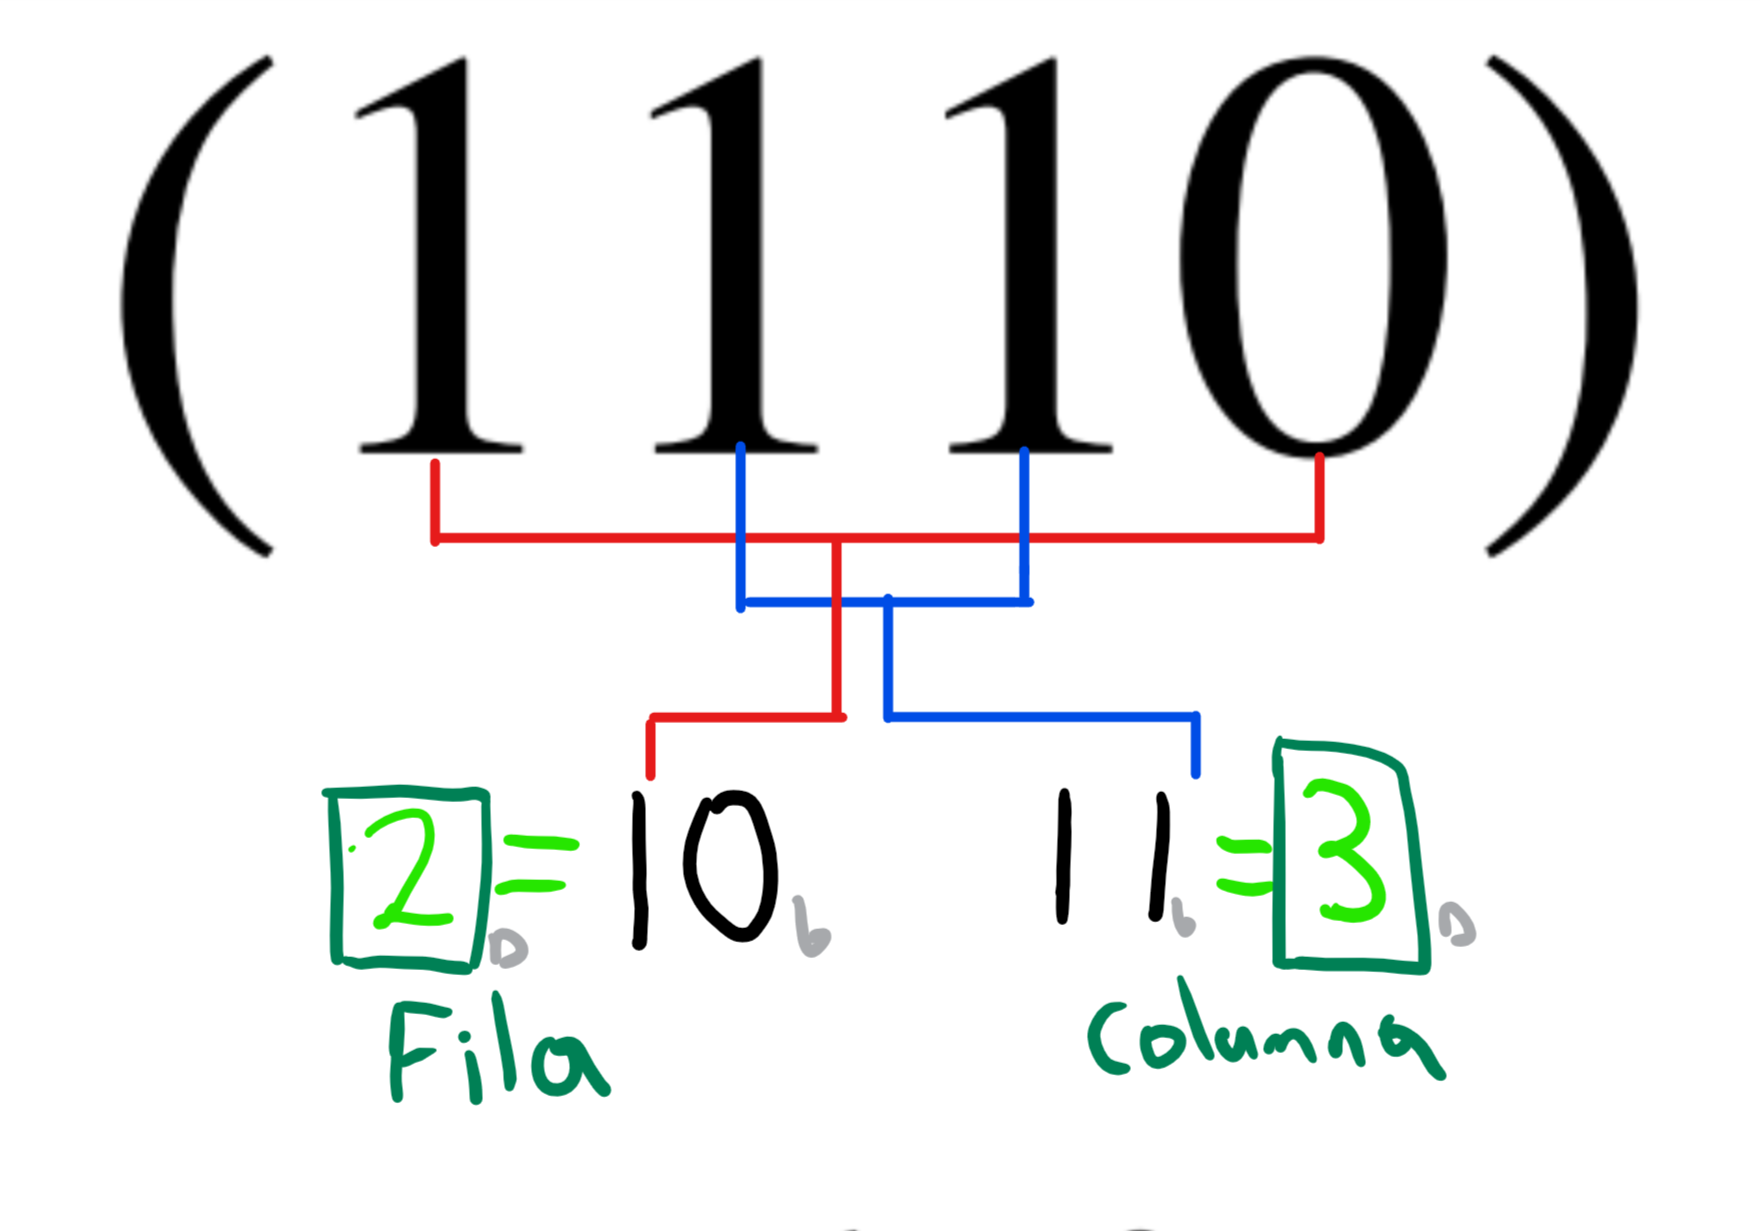

Si a este debemos aplicarle S0 tendiamos que buscar la <b>fila 2</b> y la <b>columna 3</b> por lo que la intersección en la matriz es <b>3</b> que si lo comvertimos en binario obtenemos <b>11</b>

A la parte de la izquierda aplicaremos S0 y a la derecha S1 pero para esto debemos primero declararlos en una variable

In [22]:
S0 = [
        [1, 0, 3, 2],
        [3, 2, 1, 0],
        [0, 2, 1, 3],
        [3, 1, 3, 2]
     ]

S1 = [
        [0, 1, 2, 3],
        [2, 0, 1, 3],
        [3, 0, 1, 0],
        [2, 1, 0, 3]
     ]

Aplicamos la parte de la izquierda con S0 y la parte de la derecha con S1

In [23]:
rXleft = rXor[:int(len(rXor)/2)]
rXright = rXor[int(len(rXor)/2):]
print (rXleft+" | "+rXright)
rxlS0 = Sbox(rXleft, S0)[2:]
rxrS1 = Sbox(rXright, S1)[2:]
print(rxlS0+"|"+ rxrS1)

0110 | 1000
10|11


6. Con ambas salidas vamos a aplicar la premutación P4 que esta declarada así:
    
    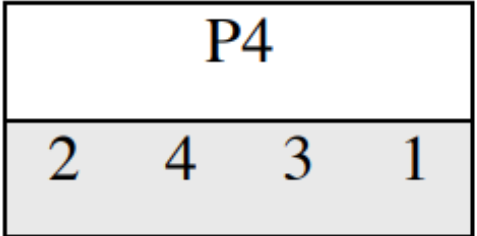
    
    definimos P4 en un arreglo:

In [24]:
P4 = (2, 4, 3, 1)

y lo aplicamos en la salida anterior:

In [25]:
f1P4 = permutation(P4, rxlS0+rxrS1)
print(f1P4)

0111


Lo siguiente es realizar un XOR con la salida anterior (P4) y la parte izquierda que usamos luego de implementar (IP) recordemos esta parte

In [26]:
mleft

'0110'

Aplicamos el XOR

In [27]:
IPXor = bin( int(f1P4, 2) ^ int(mleft, 2) )[2:].zfill(4)
print(IPXor)

0001


7. Listo llegamos a la mitad del proceso EL siguiente paso es crucial vamos a unir esta parte con la derecha del resultado de IP y vamos a cruzarlos es decir el derecho pasa a la izquierda y del mismo modo el izquierdo a el derecho. vamos a ver como seria sin realizar el cruce:

In [28]:
print(IPXor+"|"+mright)

0001|0001


Ahora realizamos el cruce

In [29]:
SW = mright+IPXor
print(SW)

00010001


8. El siguiente paso es tomar el resultado del cruce y implementar los pasos de 2 al 6 vamos a hacerlo rapido mostrando solo los resultados.

    En el paso 4 usamos la primera clave.

In [30]:
mleftSW = SW[:int(len(SW)/2)]
mrightSW = SW[int(len(SW)/2):]
print(SW)
print("----------------------------------")
print("PASO 2: ")
print("----------------------------------")
print(mleftSW+" | "+mrightSW)
print("----------------------------------")
print("PASO 3: ")
print("----------------------------------")
print("APLICAMOS EP: ")
mEpSW = permutation(EP, mrightSW)
print(mEpSW)
print("----------------------------------")
print("PASO 4: ")
print("----------------------------------")
rXorSW = bin( int(mEpSW, 2) ^ int(K1, 2) )[2:].zfill(8)
print(rXorSW)
print("----------------------------------")
print("PASO 5: ")
print("----------------------------------")
rXleftSW = rXorSW[:int(len(rXorSW)/2)]
rXrightSW = rXorSW[int(len(rXorSW)/2):]
print (rXleftSW+" | "+rXrightSW)
print("APLICAMOS S0 y S1: ")
rxlS0SW = Sbox(rXleftSW, S0)[2:]
rxrS1SW = Sbox(rXrightSW, S1)[2:]
print(rxlS0SW+"|"+ rxrS1SW)
print("----------------------------------")
print("PASO 6: ")
print("----------------------------------")
f1P4SW = permutation(P4, rxlS0SW+rxrS1SW)
print("Implementación P4: ")
print(f1P4SW)
print("XOR con "+mleftSW+" :")
IPXorSW = bin( int(f1P4SW, 2) ^ int(mleftSW, 2) )[2:].zfill(4)
print(IPXorSW)


00010001
----------------------------------
PASO 2: 
----------------------------------
0001 | 0001
----------------------------------
PASO 3: 
----------------------------------
APLICAMOS EP: 
10000010
----------------------------------
PASO 4: 
----------------------------------
10101101
----------------------------------
PASO 5: 
----------------------------------
1010 | 1101
APLICAMOS S0 y S1: 
10|00
----------------------------------
PASO 6: 
----------------------------------
Implementación P4: 
0001
XOR con 0001 :
0000


9. El resultado anterior lo unimos con la parte derecha del SW

In [31]:
finalF = IPXorSW+mrightSW
print(finalF)

00000001


10. aplicaremos la inversa de IP que esta definida de la siguiente forma:

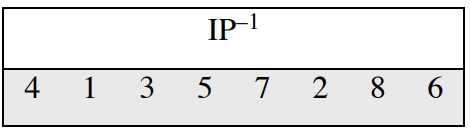

definamos la inversa de IP en una variable

In [32]:
IPi = (4, 1, 3, 5, 7, 2, 8, 6)

Apliquemosla al resulado anterior.

In [33]:
answer = permutation(IPi, finalF)

## EL RESULTADO DE LA DESENCRIPCIÓN ES:

In [34]:
print(answer)

00000010
